In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

import random
import matplotlib.pyplot as plt
from torch.optim import Adam

In [15]:
class Monotonic(nn.Module):
    def __init__(self, spread = 6):
        super().__init__()
        self.alpha = nn.Parameter(torch.abs(torch.randn(1, 1)))

    def forward(self, x):
        
        return torch.relu(self.alpha @ x.T).T


better = Monotonic()
optimizer = Adam(better.parameters(), lr = 0.01)

x = torch.arange(-15, 16).reshape(-1, 1) * 1.
y = x**2


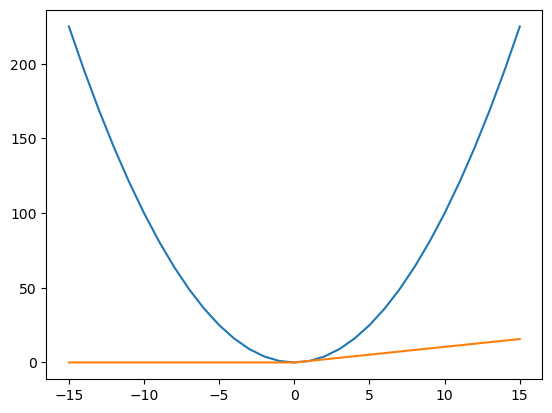

10583.978515625


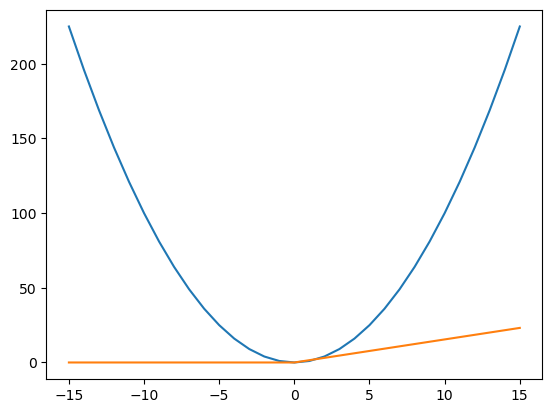

10173.25390625


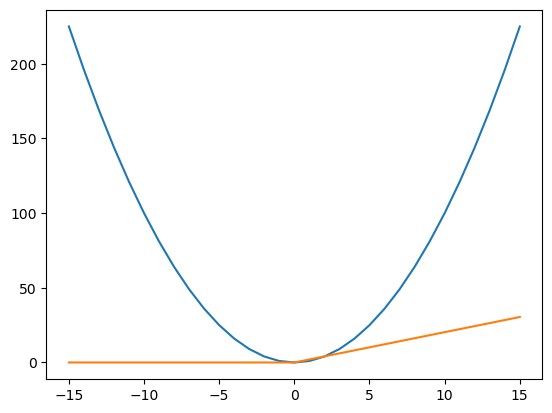

9790.4931640625


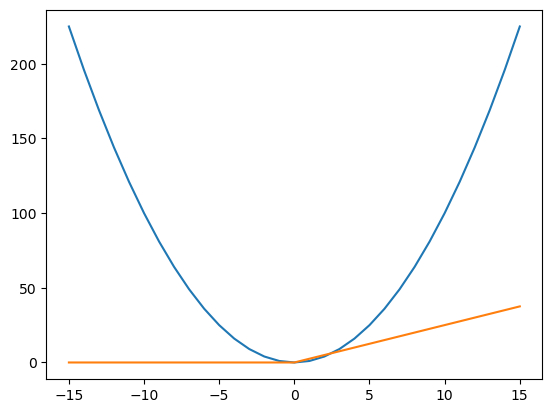

9435.46875


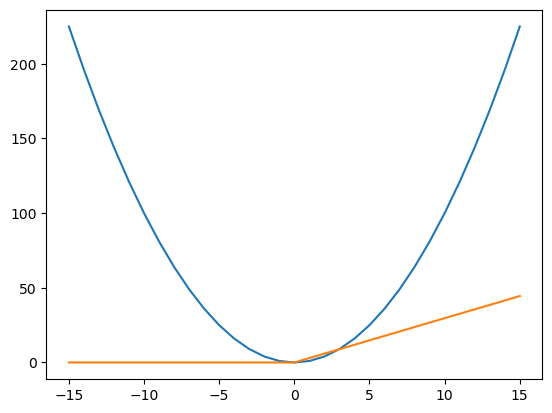

9106.8974609375


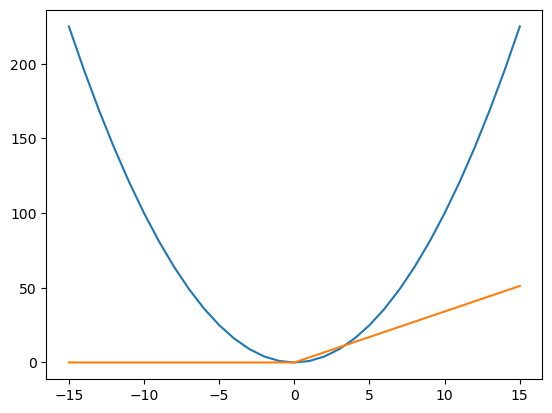

8803.4853515625


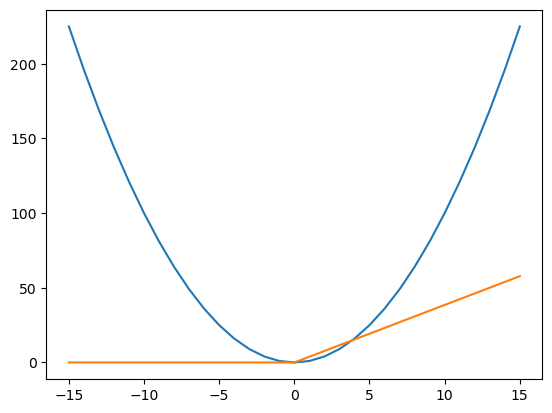

8523.9677734375


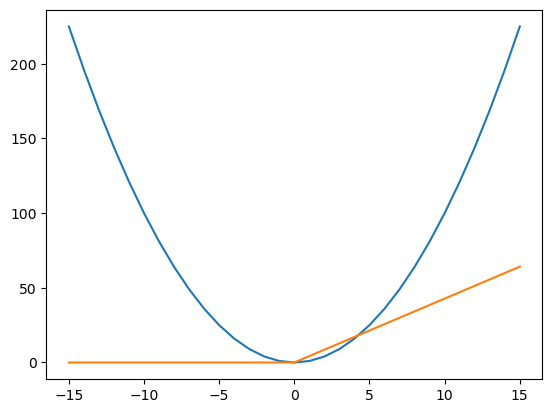

8267.10546875


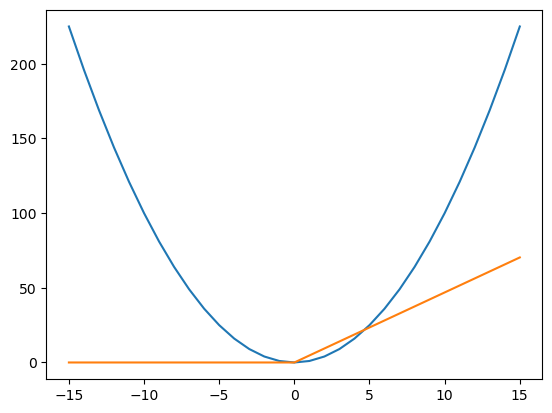

8031.67822265625


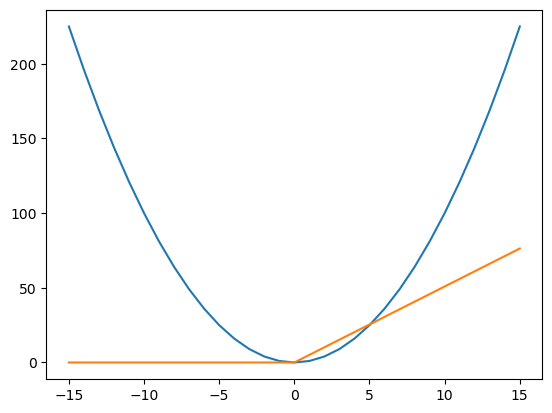

7816.48779296875


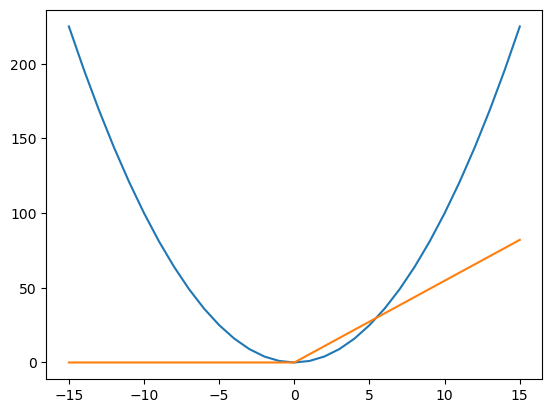

7620.36279296875


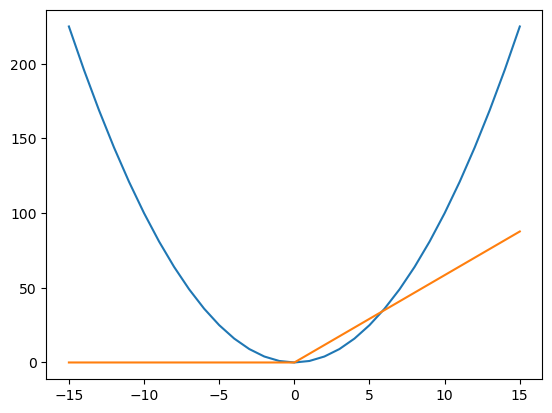

7442.15673828125


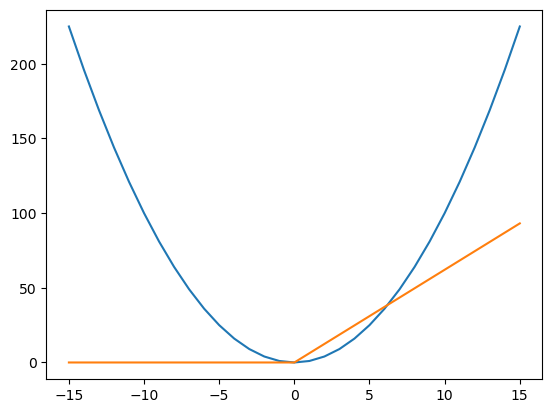

7280.74609375


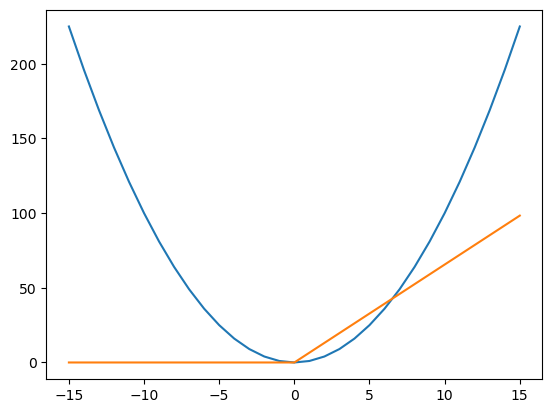

7135.03564453125


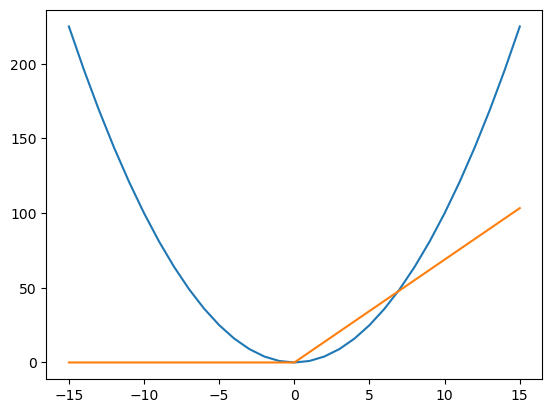

7003.962890625


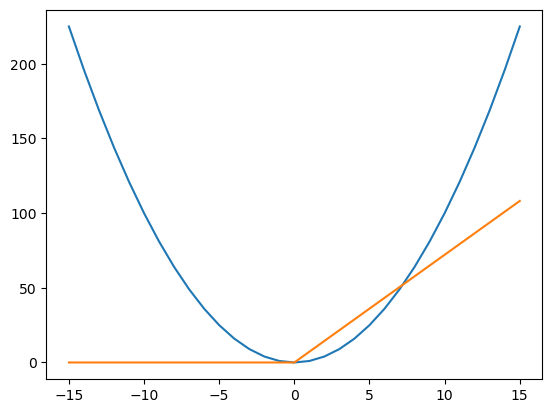

6886.48681640625


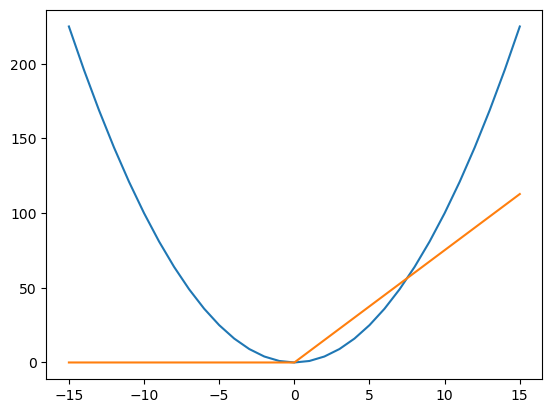

6781.60498046875


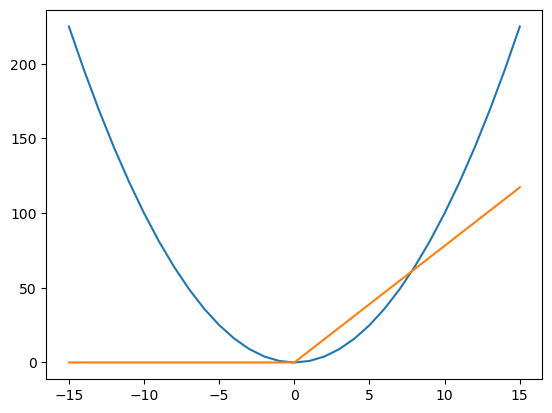

6688.34326171875


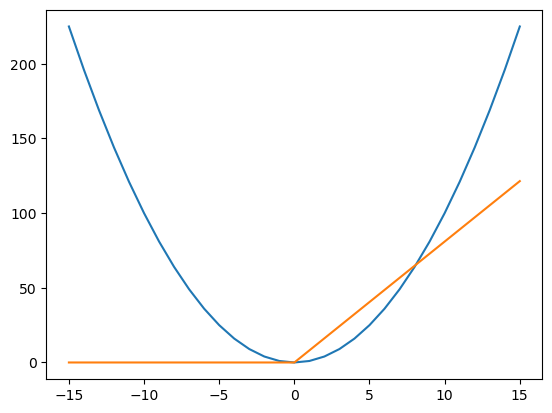

6605.7646484375


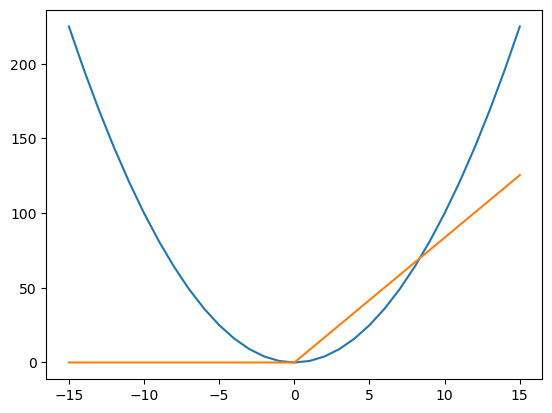

6532.96728515625


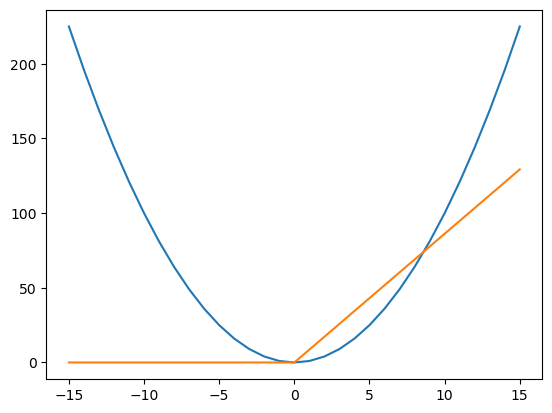

6469.087890625


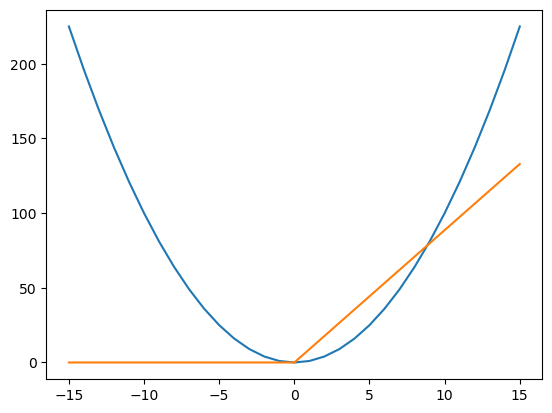

6413.302734375


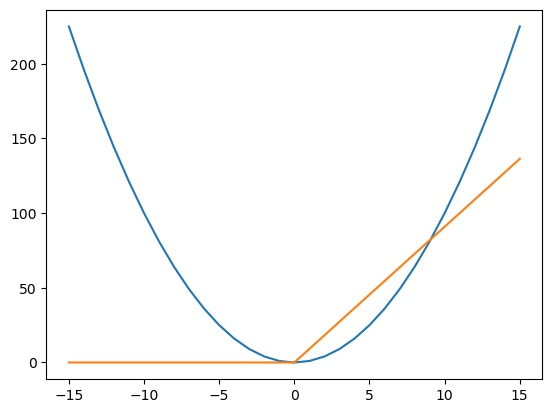

6364.83154296875


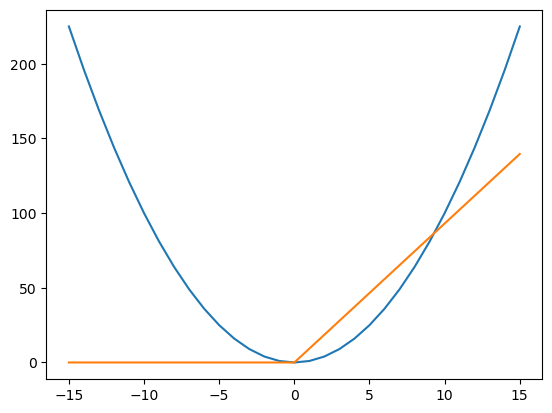

6322.93359375


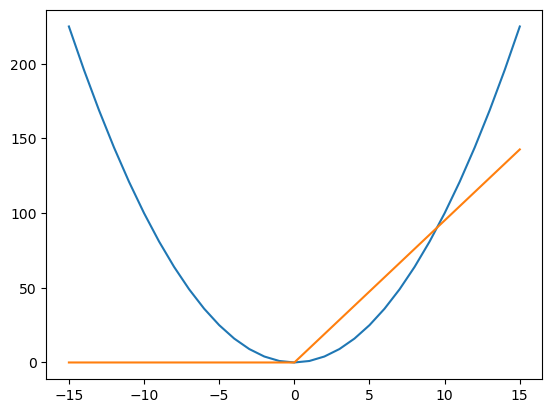

6286.91259765625


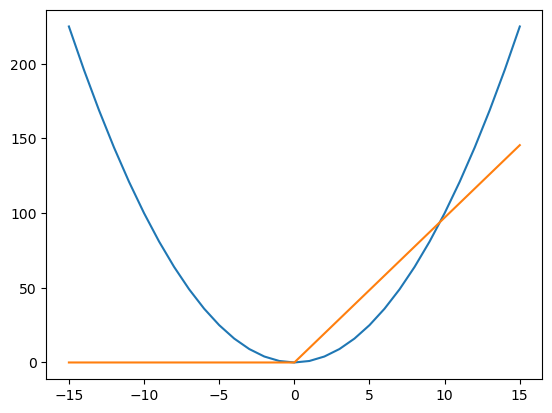

6256.123046875


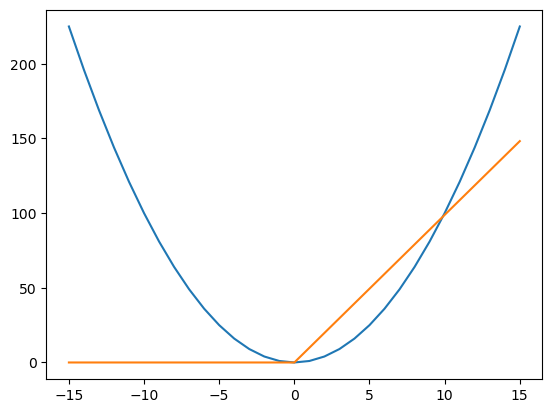

6229.955078125


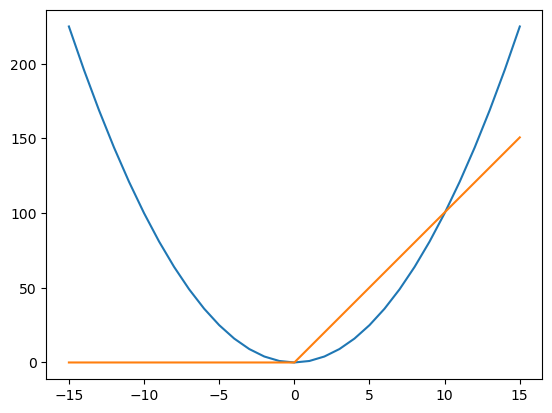

6207.8505859375


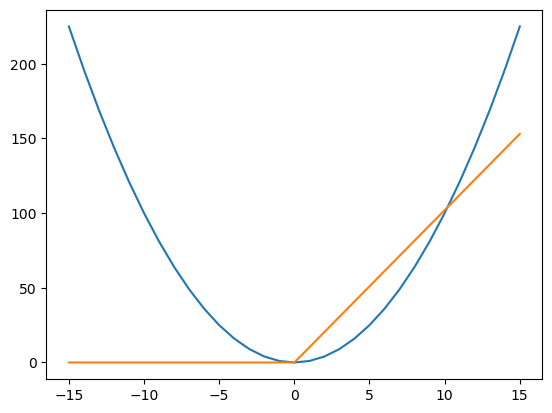

6189.296875


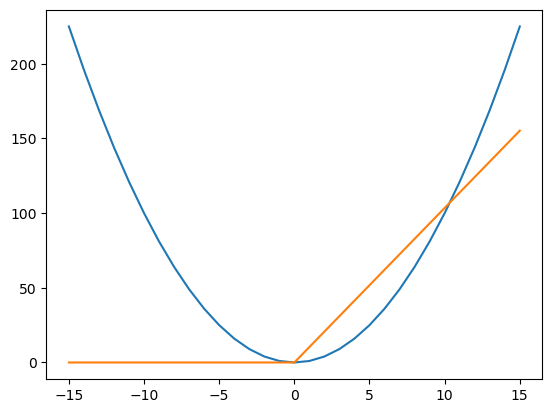

6173.8232421875


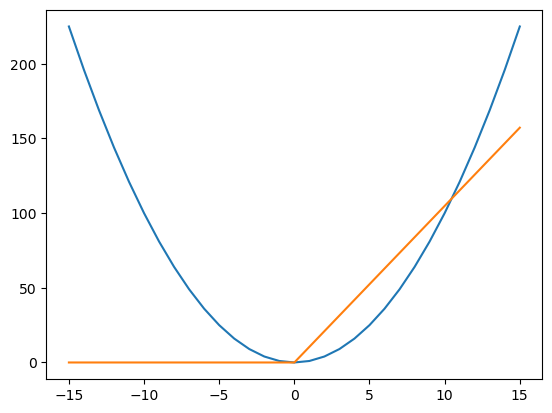

6161.00439453125


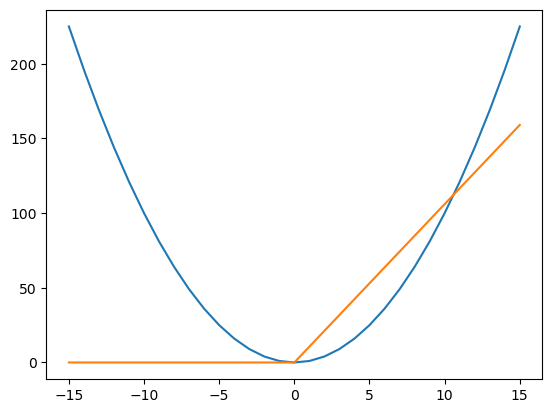

6150.4599609375


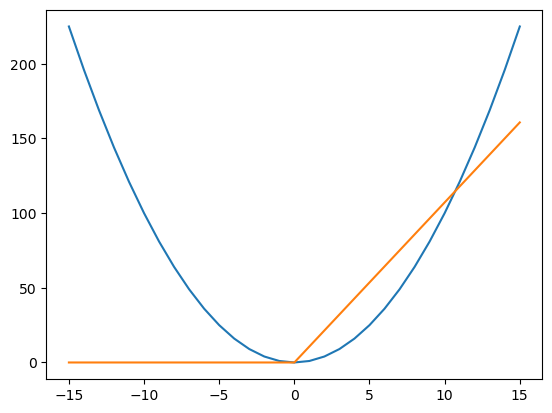

6141.8466796875


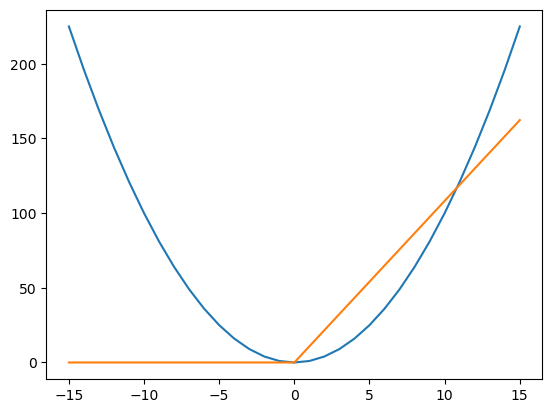

6134.86474609375


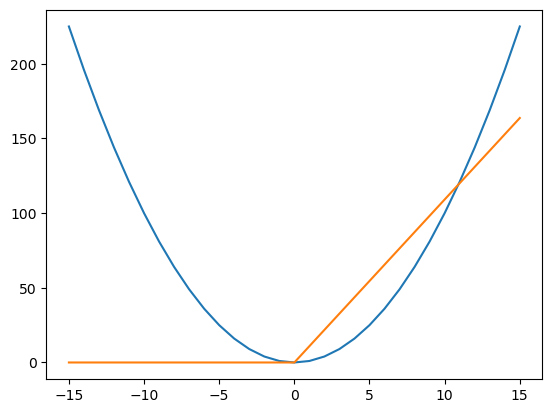

6129.2451171875


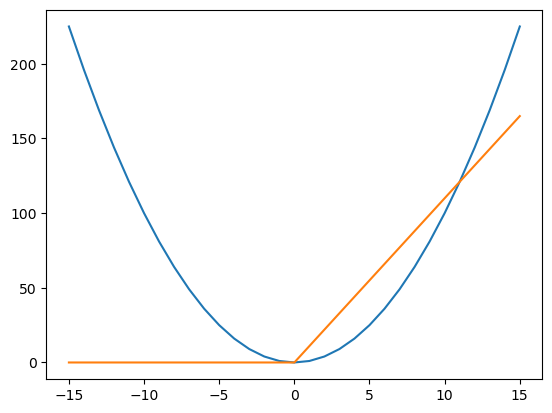

6124.75927734375


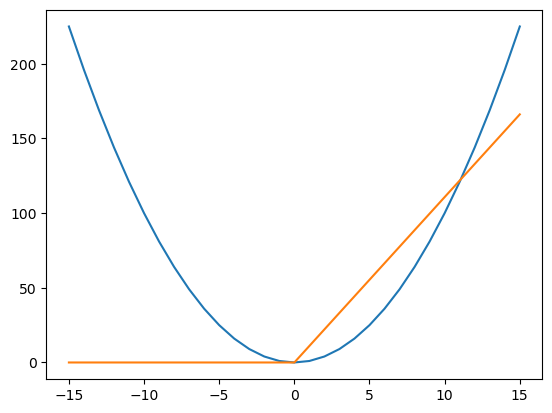

6121.20458984375


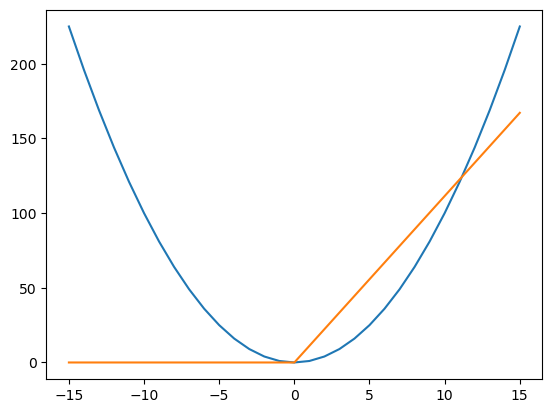

6118.4130859375


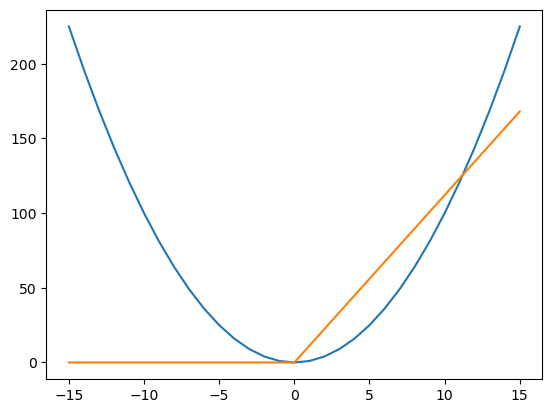

6116.23779296875


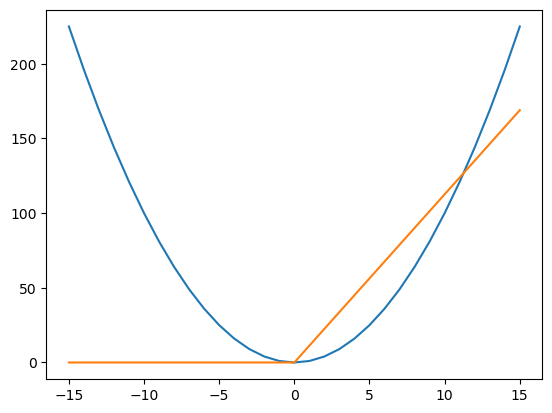

6114.55810546875


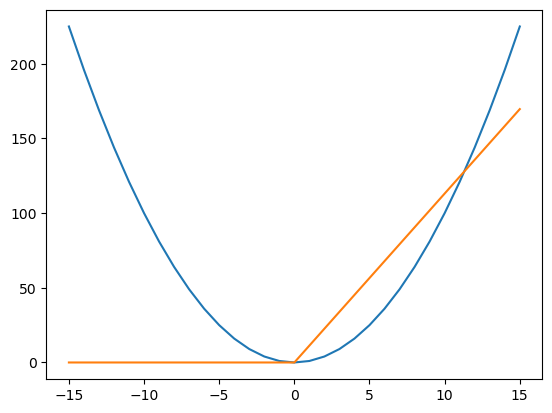

6113.27197265625


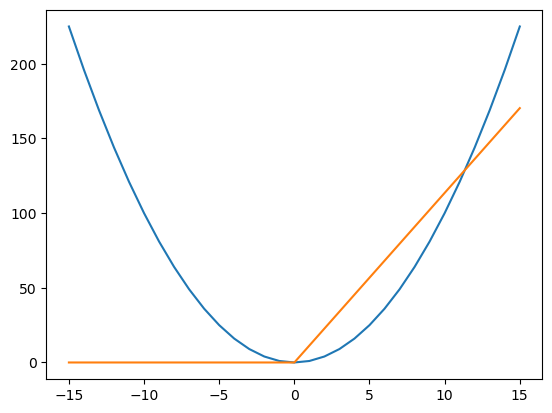

6112.29736328125


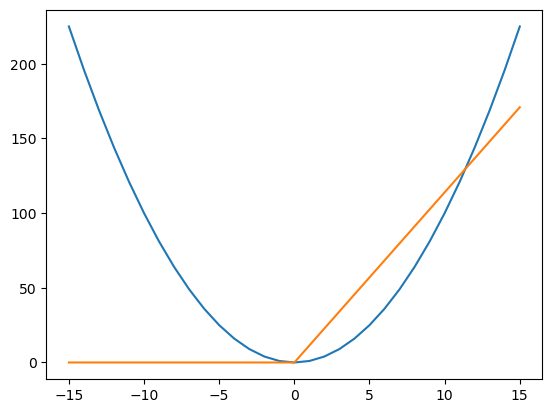

6111.56396484375


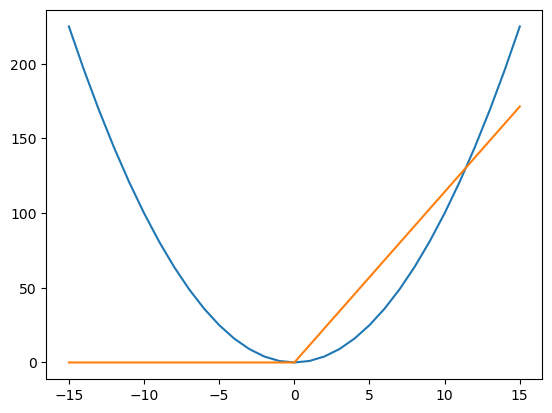

6111.01806640625


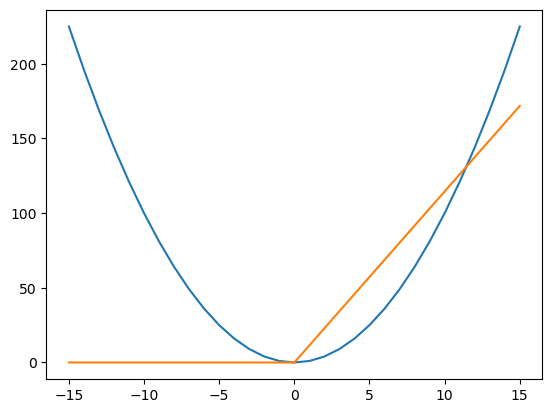

6110.61572265625


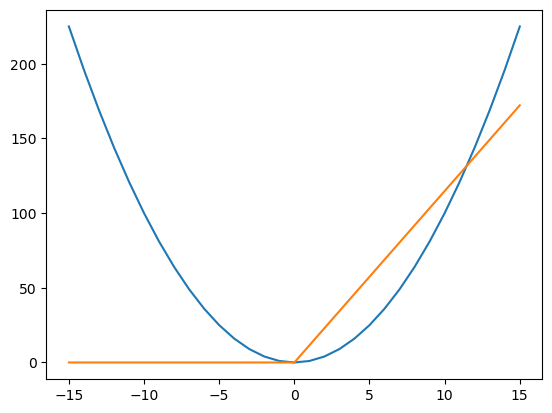

6110.322265625


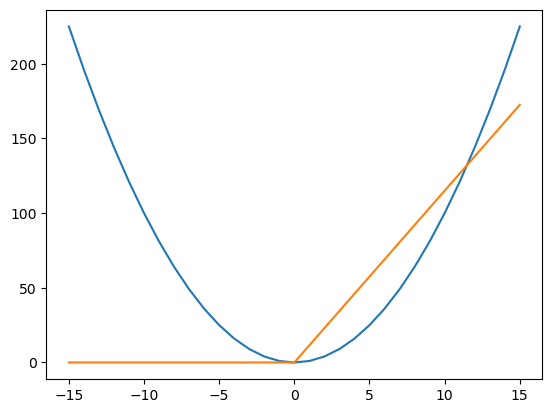

6110.1103515625


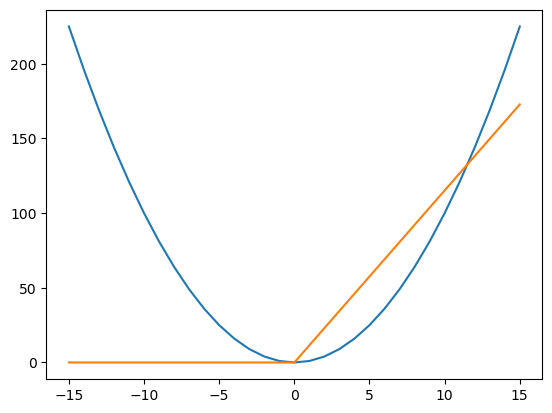

6109.95751953125


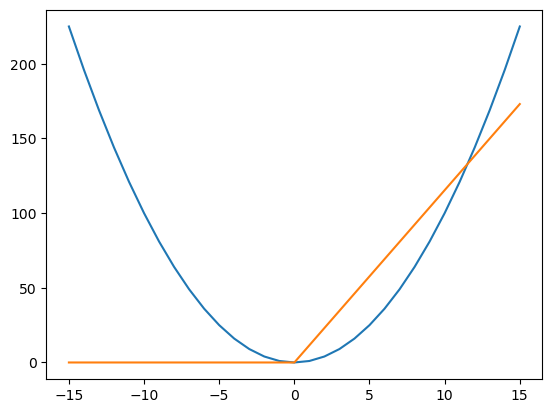

6109.85107421875


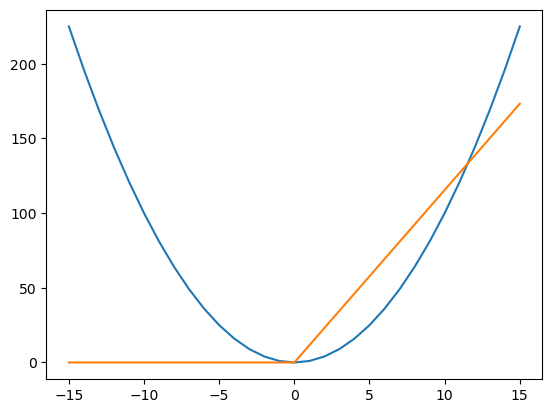

6109.77587890625


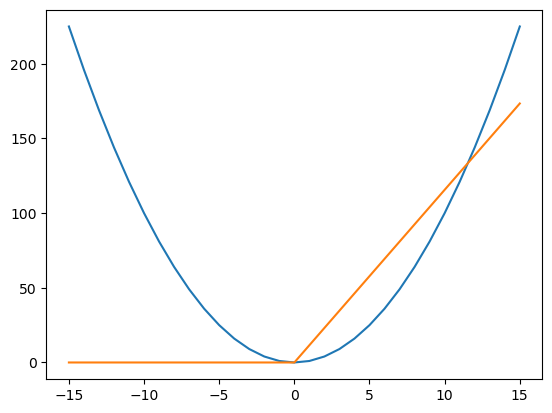

6109.7236328125


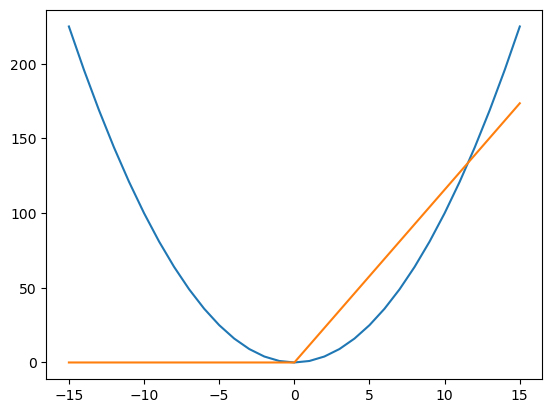

6109.6884765625


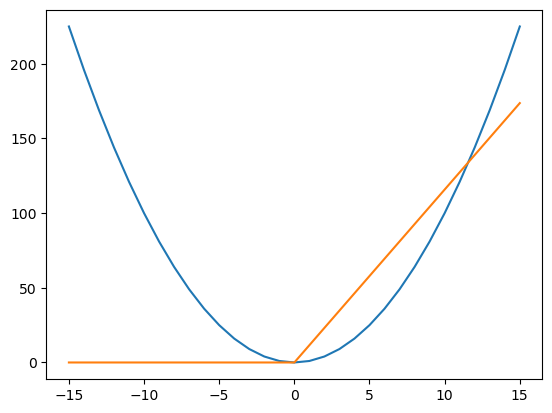

6109.6650390625


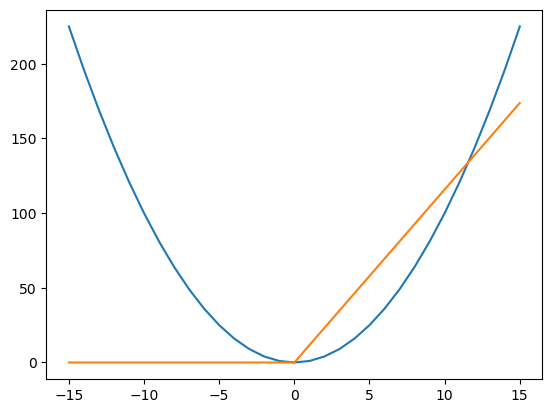

6109.64794921875


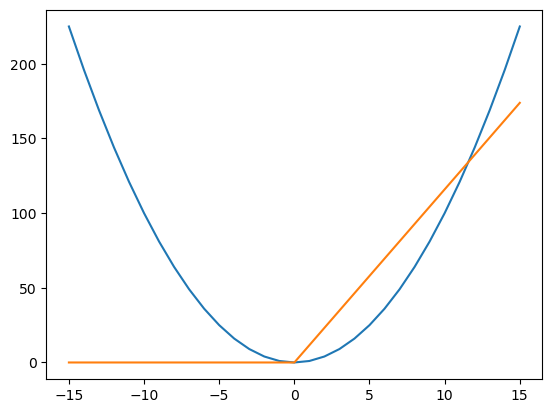

6109.63720703125


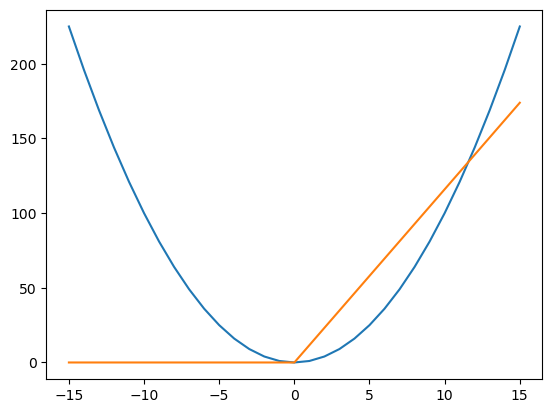

6109.63037109375


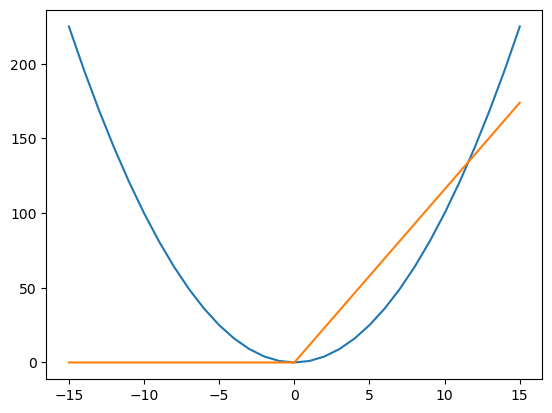

6109.6259765625


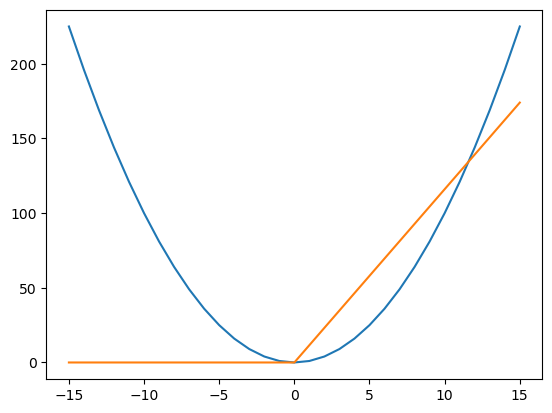

6109.623046875


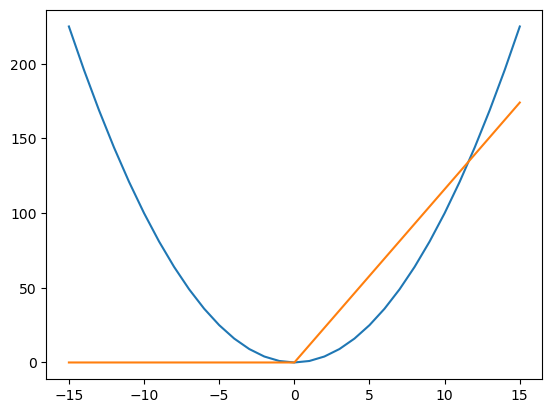

6109.6220703125


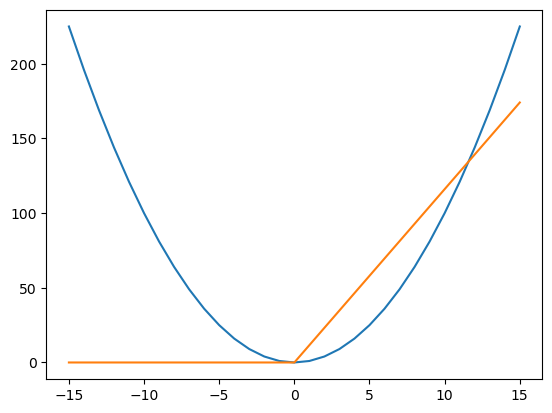

6109.62109375


In [16]:
losses = []

for i in range(3000):
    optimizer.zero_grad()

    loss = torch.mean((better(x) - y)**2) # 10 * better.monotonic_loss()**2 + 
    loss.backward()

    losses.append(loss.item())

    optimizer.step()

    if i % 50 == 0:
        plt.plot(x, y)
        plt.plot(x, better(x).detach())
        plt.show()
        
        print(loss.item()) #, better.lin1.bias)

Parameter containing:
tensor([[11.6081]], requires_grad=True)


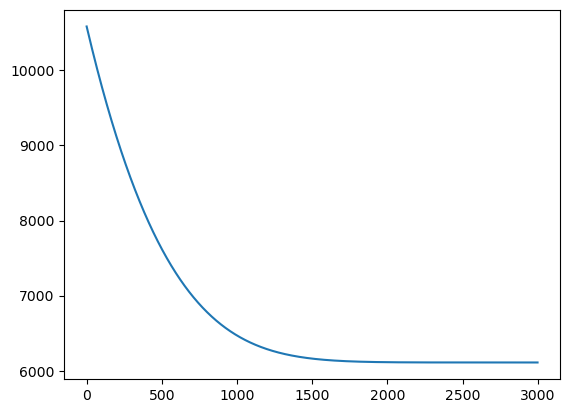

In [18]:
print(better.alpha)
plt.plot(losses)

## discretize in order to put mass over bet spread

In [89]:
class MonotonicBetSpread(nn.Module):
    def __init__(self, spread = 6):
        super().__init__()
        self.alpha = nn.Parameter(torch.randn(1, 1))
        self.spread = spread
        

    def forward(self, x):

        center = torch.relu(torch.abs(self.alpha) @ x.T).T

        options = torch.arange(1, self.spread + 1)
        probs_unnormalized = torch.exp(-1 * torch.abs(options - center) / 0.3)

        probs = probs_unnormalized / probs_unnormalized.sum(axis = 1).reshape(-1, 1)
        
        return probs


better = MonotonicBetSpread()
optimizer = Adam(better.parameters(), lr = 0.01)

x = torch.arange(0, 12).reshape(-1, 1) * 1.


In [90]:
better(x)

tensor([[9.6433e-01, 3.4401e-02, 1.2272e-03, 4.3780e-05, 1.5618e-06, 5.5716e-08],
        [9.6433e-01, 3.4401e-02, 1.2272e-03, 4.3780e-05, 1.5618e-06, 5.5716e-08],
        [9.6433e-01, 3.4401e-02, 1.2272e-03, 4.3780e-05, 1.5618e-06, 5.5716e-08],
        [8.5243e-01, 1.4231e-01, 5.0767e-03, 1.8111e-04, 6.4608e-06, 2.3048e-07],
        [2.7232e-01, 7.0172e-01, 2.5033e-02, 8.9303e-04, 3.1858e-05, 1.1365e-06],
        [3.2784e-02, 9.1898e-01, 4.6516e-02, 1.6594e-03, 5.9198e-05, 2.1118e-06],
        [1.9327e-02, 5.4176e-01, 4.2326e-01, 1.5099e-02, 5.3865e-04, 1.9216e-05],
        [2.6346e-03, 7.3852e-02, 8.9057e-01, 3.1770e-02, 1.1334e-03, 4.0432e-05],
        [9.9225e-04, 2.7814e-02, 7.7968e-01, 1.8469e-01, 6.5885e-03, 2.3504e-04],
        [2.6358e-04, 7.3887e-03, 2.0712e-01, 7.5725e-01, 2.7014e-02, 9.6371e-04],
        [4.0850e-05, 1.1451e-03, 3.2099e-02, 8.9979e-01, 6.4621e-02, 2.3053e-03],
        [2.0777e-05, 5.8243e-04, 1.6326e-02, 4.5765e-01, 5.0732e-01, 1.8098e-02]],
       grad_fn=